In [1]:
%matplotlib inline
import matplotlib.pyplot as plt      

from torch.optim import Adam
from torch import nn
from sgdr import SGDRScheduler, LRFinderScheduler

## SGDR
It is not straightforward to copy the optimization settings from the Tacotron2 paper because they used a batch size of 64 (my maximum batch size is 12) and didn't give the exact details of their weight initialization and architecture. Therefore I've found it beneficial to avoid the issue by using cosine annealing with warm restarts to try many learning rates within a range and using a learning rate finding technique to choose the boundaries of said range.

In [2]:
model = nn.Linear(1, 1)

In [3]:
optimizer = Adam(model.parameters(), lr=1e-1)

`SGDRScheduler` anneals lr with cosine annealing until it hits a minimum lr at the end of the cycle. It then resets the learning rate to the max (starting) learning rate. This speeds convergence, creates free ensembles and helps to jump models out of local minima.

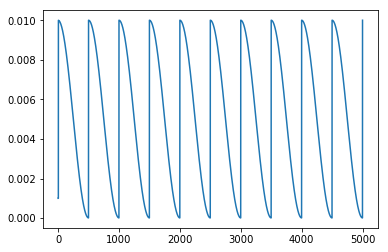

In [4]:
scheduler = SGDRScheduler(optimizer, min_lr=1e-5, max_lr=1e-2, cycle_length=500)
lrs = []
for i in range(5000):
    scheduler.step()
    lrs.append(optimizer.param_groups[0]['lr'])
plt.plot(lrs);

`LRFinderScheduler` should be run once each time model parameters (batch size, regularization, architecture, ect.) are changed. It exponentially increases the learning rate every step (batch). To find the optimal learning rate for your model settings, train the model with this scheduler and plot the loss vs the lr at each step. Then, choose a learning rate just before the loss starts to explode.

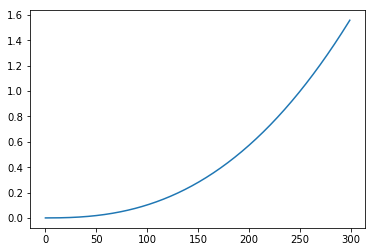

In [8]:
scheduler = LRFinderScheduler(optimizer, gamma=2.5)
lrs = []
for i in range(300):
    scheduler.step()
    lrs.append(scheduler.lr)
plt.plot(lrs);